In [40]:
from keras.datasets import imdb

In [41]:
# Read data from text files
with open('reviews.txt', 'r') as f:
    reviews = f.read()

with open('labels.txt', 'r') as f:
    labels = f.read()

print(reviews[:50])
print()
print(labels[:26])


What a thrilling ride! The visuals were mediocre. 




In [42]:
reviews = reviews.lower()

In [43]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [44]:
all_text = ''.join([c for c in reviews if c not in punctuation])


In [45]:
# Read data from text file
with open('reviews.txt', 'r') as f:
    all_text = f.read()

# Split reviews into a list
reviews_split = all_text.split('\n')

# Print the number of reviews
print('Number of reviews:', len(reviews_split))


Number of reviews: 2601


In [49]:
from collections import Counter
from string import punctuation

# Step 1: Read data from the reviews file
with open('reviews.txt', 'r') as f:
    all_text = f.read()

# Step 2: Split reviews into a list
reviews_split = all_text.split('\n')

# Step 3: Convert all text to lowercase
all_text = all_text.lower()

# Step 4: Remove punctuation
all_text = ''.join([c for c in all_text if c not in punctuation])

# Step 5: Create a list of words
words = all_text.split()  # Split text into words

# Step 6: Count all the words using Counter
count_words = Counter(words)  # Count occurrences of each word
total_words = len(words)  # Get total number of words
sorted_words = count_words.most_common(total_words)  # Sort words by frequency

# Step 7: Print results
print('Number of reviews:', len(reviews_split))
print('Total words:', total_words)
print('Most common words:')
for word, count in sorted_words[:10]:  # Print top 10 most common words
    print(f"{word}: {count}")


Number of reviews: 2601
Total words: 48326
Most common words:
the: 7227
was: 3272
were: 2052
characters: 1816
a: 1451
felt: 980
it: 909
performances: 782
i: 772
film: 736


In [51]:
print (count_words)

Counter({'the': 7227, 'was': 3272, 'were': 2052, 'characters': 1816, 'a': 1451, 'felt': 980, 'it': 909, 'performances': 782, 'i': 772, 'film': 736, 'cinematography': 547, 'breathtaking': 547, 'ensemble': 538, 'cast': 538, 'delivered': 538, 'solid': 538, 'character': 530, 'development': 530, 'wellexecuted': 530, 'visuals': 528, 'mediocre': 528, 'art': 521, 'direction': 521, 'forgettable': 521, 'some': 516, 'onedimensional': 516, 'every': 513, 'frame': 513, 'meticulously': 513, 'crafted': 513, 'couldnt': 511, 'connect': 511, 'with': 511, 'relatable': 505, 'special': 491, 'effects': 491, 'impressive': 491, 'too': 464, 'predictable': 464, 'mixed': 445, 'bag': 445, 'humor': 439, 'spoton': 439, 'climax': 423, 'fell': 423, 'flat': 423, 'pacing': 422, 'dragged': 422, 'in': 422, 'middle': 422, 'storyline': 407, 'kept': 407, 'me': 407, 'on': 407, 'edge': 407, 'of': 407, 'my': 407, 'seat': 407, 'wellwritten': 284, 'plot': 277, 'convoluted': 277, 'absolutely': 277, 'mesmerizing': 277, 'decent': 27

In [54]:
vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}


In [55]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}


In [56]:
print (vocab_to_int)

{'the': 1, 'was': 2, 'were': 3, 'characters': 4, 'a': 5, 'felt': 6, 'it': 7, 'performances': 8, 'i': 9, 'film': 10, 'cinematography': 11, 'breathtaking': 12, 'ensemble': 13, 'cast': 14, 'delivered': 15, 'solid': 16, 'character': 17, 'development': 18, 'wellexecuted': 19, 'visuals': 20, 'mediocre': 21, 'art': 22, 'direction': 23, 'forgettable': 24, 'some': 25, 'onedimensional': 26, 'every': 27, 'frame': 28, 'meticulously': 29, 'crafted': 30, 'couldnt': 31, 'connect': 32, 'with': 33, 'relatable': 34, 'special': 35, 'effects': 36, 'impressive': 37, 'too': 38, 'predictable': 39, 'mixed': 40, 'bag': 41, 'humor': 42, 'spoton': 43, 'climax': 44, 'fell': 45, 'flat': 46, 'pacing': 47, 'dragged': 48, 'in': 49, 'middle': 50, 'storyline': 51, 'kept': 52, 'me': 53, 'on': 54, 'edge': 55, 'of': 56, 'my': 57, 'seat': 58, 'wellwritten': 59, 'plot': 60, 'convoluted': 61, 'absolutely': 62, 'mesmerizing': 63, 'decent': 64, 'flick': 65, 'total': 66, 'disappointment': 67, 'found': 68, 'lacking': 69, 'an': 7

In [60]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split() if w in vocab_to_int]  # Skip words not in vocab_to_int
    reviews_int.append(r)

print(reviews_int[0:3])


[[5, 73, 20, 3, 2, 5, 40, 4, 3], [10, 77, 5, 78, 11, 2, 47, 48, 49, 1, 4, 3], [66, 11, 2, 42, 2, 32, 33, 1]]


In [61]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

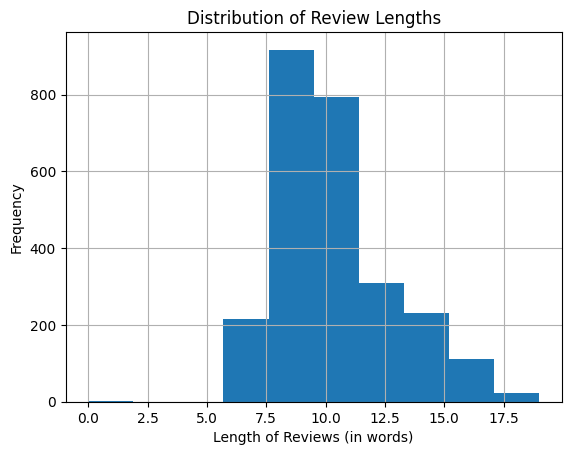

count    2601.000000
mean       10.386390
std         2.569846
min         0.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        19.000000
dtype: float64


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Use inline plotting for Jupyter notebooks
%matplotlib inline

# Calculate the length of each review in integer format
reviews_len = [len(x) for x in reviews_int]

# Create a histogram of the review lengths
pd.Series(reviews_len).hist()
plt.xlabel('Length of Reviews (in words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

# Get summary statistics of the review lengths
print(pd.Series(reviews_len).describe())


In [68]:
# Check the lengths of the lists before filtering
print(f'Length of reviews_int: {len(reviews_int)}')
print(f'Length of encoded_labels: {len(encoded_labels)}')
print(f'Length of reviews_len: {len(reviews_len)}')

# Inspect the contents of the lists to identify potential issues
print('First few reviews_int:', reviews_int[:5])
print('First few encoded_labels:', encoded_labels[:5])
print('First few reviews_len:', reviews_len[:5])

# Ensure both lists are filtered together
filtered_reviews_int = []
filtered_encoded_labels = []

# Iterate through reviews_len and filter accordingly
for i, l in enumerate(reviews_len):
    if l > 0:  # Check if the review length is greater than zero
        filtered_reviews_int.append(reviews_int[i])  # Append the corresponding review
        filtered_encoded_labels.append(encoded_labels[i])  # Append the corresponding label

# Update the original lists with the filtered results
reviews_int = filtered_reviews_int
encoded_labels = filtered_encoded_labels

# Check the lengths after filtering
print(f'Filtered length of reviews_int: {len(reviews_int)}')
print(f'Filtered length of encoded_labels: {len(encoded_labels)}')


Length of reviews_int: 2600
Length of encoded_labels: 1
Length of reviews_len: 2601
First few reviews_int: [[5, 73, 20, 3, 2, 5, 40, 4, 3], [10, 77, 5, 78, 11, 2, 47, 48, 49, 1, 4, 3], [66, 11, 2, 42, 2, 32, 33, 1], [4, 3, 35, 36, 3, 42, 2, 4, 6], [4, 3, 28, 2, 29, 2, 5, 40, 13, 14, 15, 16]]
First few encoded_labels: [0]
First few reviews_len: [9, 12, 8, 9, 12]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [69]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input
    seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype=int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length - review_len))
            new = zeroes + review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i, :] = np.array(new)
    
    return features


In [38]:
print (features[:10,:])

[[ 0  0  1  2  3]
 [ 0  0  0  4  5]
 [ 6  7  8  9 10]
 [ 0  0  0 11 12]
 [13 14 15 16 17]
 [ 0  0  0  0 19]
 [ 0 20 21 22 23]
 [ 0  0  0  0 24]
 [ 0 25 26 27 28]
 [ 0  0  0 29 30]]


In [70]:
print (features[:10,:])

[[ 0  0  1  2  3]
 [ 0  0  0  4  5]
 [ 6  7  8  9 10]
 [ 0  0  0 11 12]
 [13 14 15 16 17]
 [ 0  0  0  0 19]
 [ 0 20 21 22 23]
 [ 0  0  0  0 24]
 [ 0 25 26 27 28]
 [ 0  0  0 29 30]]


In [71]:
# Split the data into training, validation, and test sets
split_frac = 0.8
train_x = features[0:int(split_frac * len_feat)]
train_y = encoded_labels[0:int(split_frac * len_feat)]

# Remaining data for validation and test
remaining_x = features[int(split_frac * len_feat):]
remaining_y = encoded_labels[int(split_frac * len_feat):]

# Split the remaining data into validation and test sets
valid_x = remaining_x[0:int(len(remaining_x) * 0.5)]
valid_y = remaining_y[0:int(len(remaining_y) * 0.5)]

test_x = remaining_x[int(len(remaining_x) * 0.5):]
test_y = remaining_y[int(len(remaining_y) * 0.5):]
